In [1]:
import pandas as pd
import numpy as np

In [2]:
cc = pd.read_csv('cc.csv')
demo = pd.read_csv('demographics.csv')
kplus = pd.read_csv('kplus.csv')

In [3]:
train = pd.read_csv('train.csv')

In [4]:
# rename cc columns name
cc.columns = ['cc_no','date','spend_amount']
demo.columns = ['id','cc_no','gender','occupation','age']
kplus.columns = ['id','week','count/week','spend/week']

In [6]:
# change data types

cc.date = cc.date.astype('datetime64[ns]')
demo.gender = demo.gender.astype('category')
demo.occupation = demo.occupation.astype('category')
demo.age = demo.age.astype('category')
kplus.week = kplus.week.astype('datetime64[ns]')

In [7]:
# check data type

print(cc.dtypes)
print(demo.dtypes)
kplus.dtypes

cc_no                    int64
date            datetime64[ns]
spend_amount             int64
dtype: object
id               int64
cc_no            int64
gender        category
occupation    category
age           category
dtype: object


id                     int64
week          datetime64[ns]
count/week             int64
spend/week             int64
dtype: object

In [8]:
# enrich new feature >> #card

cc_count = demo.id.value_counts()
c_list = []
for i in range(1,len(cc_count)+1):{
    c_list.append(cc_count[i])
}
c_list

[2,
 2,
 1,
 2,
 1,
 2,
 4,
 2,
 3,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 2,
 4,
 3,
 1,
 3,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 4,
 3,
 2,
 4,
 3,
 1,
 2,
 1,
 4,
 1,
 1,
 4,
 2,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 5,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 4,
 3,
 1,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 5,
 1,
 2,
 1,
 4,
 1,
 2,
 4,
 1,
 3,
 2,
 3,
 3,
 3,
 6,
 1,
 3,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 4,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 4,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 2,
 4,
 1,
 1,
 3,
 5,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 1,
 3,
 2,
 2,
 6,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 3,
 2,
 5,


In [17]:
data = demo

In [18]:
data = data.drop(columns=['cc_no'])

In [19]:
data.drop_duplicates(subset='id',keep = 'first', inplace = True)

In [20]:
data['cc_count'] = c_list
data

,id,gender,occupation,age,cc_count
0,1,2,9.0,5,2
2,2,2,3.0,4,2
4,3,2,1.0,3,1
5,4,2,3.0,5,2
7,5,2,9.0,4,1
...,...,...,...,...,...
102404,64996,2,3.0,2,1
102405,64997,2,3.0,2,1
102406,64998,1,9.0,3,1
102407,64999,2,3.0,3,1


In [28]:
import seaborn as sb

In [39]:
import matplotlib.pyplot as plt

In [21]:
testdata = data[50000:65000]
data = data[0:50000]

In [25]:
data = pd.merge(data, train, on='id')

In [26]:
data

,id,gender,occupation,age,cc_count,income
0,1,2,9.0,5,2,20000
1,2,2,3.0,4,2,106000
2,3,2,1.0,3,1,29000
3,4,2,3.0,5,2,61000
4,5,2,9.0,4,1,18000
...,...,...,...,...,...,...
49995,49996,2,3.0,4,2,48000
49996,49997,1,9.0,5,2,37000
49997,49998,2,9.0,2,1,19000
49998,49999,2,3.0,3,2,13000


In [44]:
data.describe()

,id,cc_count,income
count,50000.000000,50000.000000,50000.000000
mean,25000.500000,1.700260,47951.060000
std,14433.901067,0.884687,53230.605621
min,1.000000,1.000000,10000.000000
25%,12500.750000,1.000000,20000.000000
50%,25000.500000,1.000000,30000.000000
75%,37500.250000,2.000000,52000.000000
max,50000.000000,11.000000,500000.000000


There are slightly women more than men

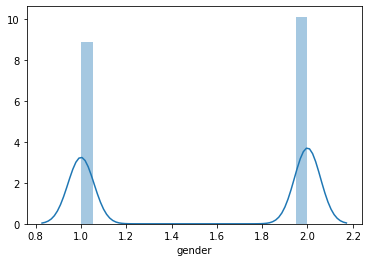

In [46]:
p1=sb.distplot(data['gender'])

major age ranges which use credit card the most are 3 and 4, which should be middle-aged people

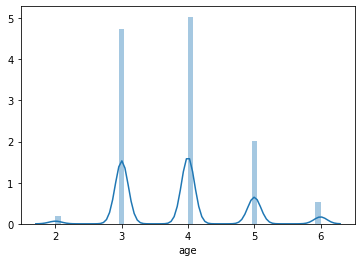

In [51]:
p1=sb.distplot(data['age'])

Major occupation are 3 and 7

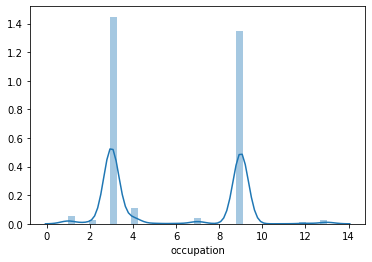

In [48]:
p1=sb.distplot(data.dropna().occupation)

people dont really aim for many cards in 1 bank, they tends to have only just a few

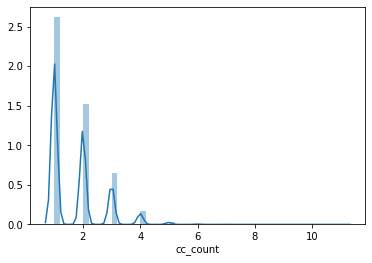

In [50]:
p1=sb.distplot(data['cc_count'])

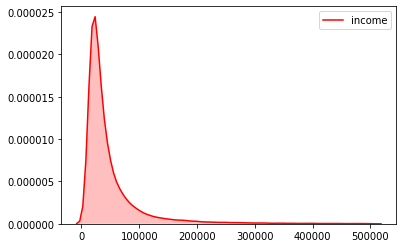

In [30]:
p1=sb.kdeplot(data['income'], shade=True, color="r")

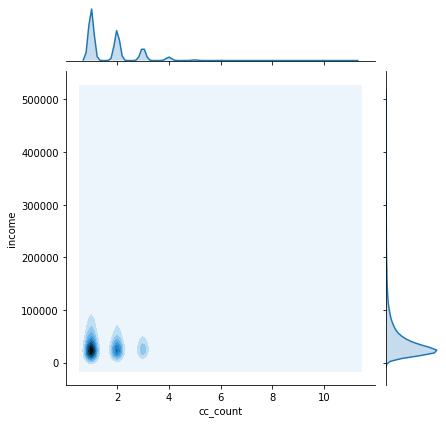

In [235]:
sb.jointplot(x="cc_count", y="income", data=data, kind="kde")

D:\CONDA\envs\gpu\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\CONDA\envs\gpu\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


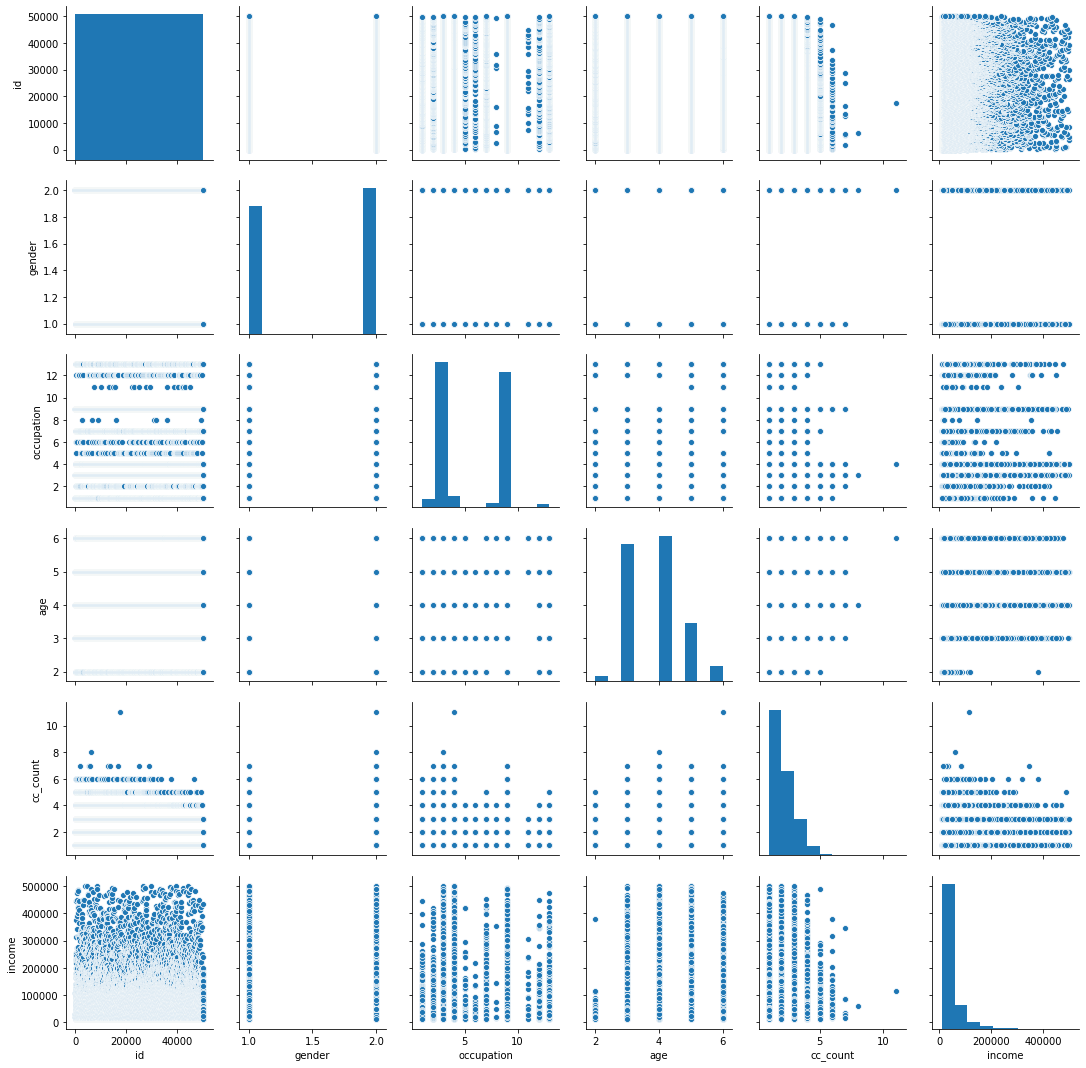

In [236]:
sb.pairplot(data);

# Try fitting simple model with all features